# Classic Convolutional Neural Networks: LeNet-5, AlexNet, and VGG-16

This notebook explores three seminal CNN architectures that played crucial roles in the development of deep learning for visual tasks:

1. **LeNet-5 (1998)**: One of the earliest CNNs, designed for digit recognition.
2. **AlexNet (2012)**: The model that reignited interest in deep learning by winning the ImageNet competition.
3. **VGG-16 (2014)**: A deeper network that showed the importance of depth in neural networks.

I'll implement each of these models using TensorFlow and Keras, analyze their architectures, and discuss their historical significance and impact on the field of deep learning.

In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, AveragePooling2D, Activation, Dropout, MaxPooling2D, Resizing
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import visualkeras
from tabulate import tabulate

# LeNet-5

### Historical Context
- Developed in 1998 by Yann LeCun and colleagues
- Designed for handwritten and machine-printed character recognition
- One of the first successful applications of CNNs

### Architecture Overview
- 7 layers (not counting input)
- Uses convolutions, pooling, and fully connected layers
- Relatively small: 61,706 parameters

### Key Features
- Introduces the basic CNN structure: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected -> Output
- Uses tanh activation functions
- Uses average pooling

### Limitations
- Designed for small grayscale images (32x32 pixels)
- Limited depth compared to modern architectures

In [2]:
def LeNet_5():
    model = Sequential()
    model.add(Conv2D(6, 5, activation='tanh', input_shape=(32, 32, 1)))
    model.add(AveragePooling2D(2))
    model.add(Activation('sigmoid'))
    model.add(Conv2D(16, 5, activation='tanh'))
    model.add(AveragePooling2D(2))
    model.add(Activation('sigmoid'))
    model.add(Conv2D(120, 5, activation='tanh'))
    model.add(Flatten())
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    return model

In [3]:
model = LeNet_5()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


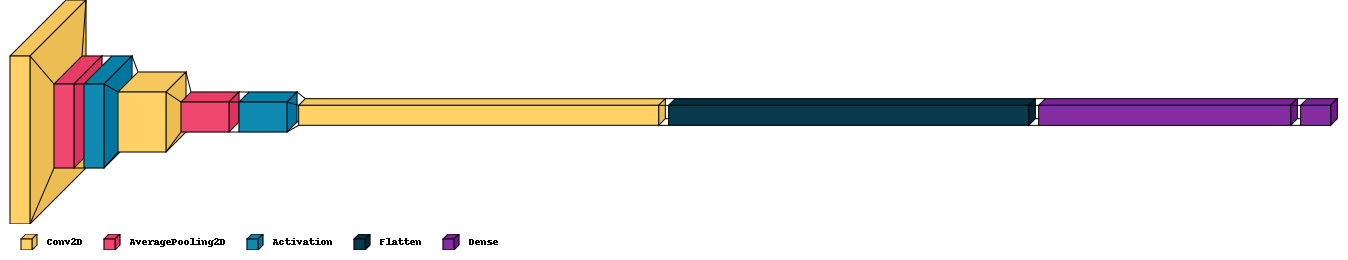

In [4]:
visualkeras.layered_view(model, legend=True, draw_volume=True, scale_xy=6, scale_z=3)

In [5]:
del model

# AlexNet

### Historical Context
- Developed in 2012 by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton
- Won the 2012 ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

### Architecture Overview
- 8 layers (5 convolutional, 3 fully connected)
- Significantly larger than LeNet-5: more than 60 million parameters
- Designed for color images (227x227x3)

### Key Features
- Uses ReLU activation functions
- Uses max pooling
- Introduces dropout for regularization

### Limitations
- High computational requirements
- Prone to overfitting without proper regularization

In [6]:
def AlexNet():
    model = Sequential()
    model.add(Resizing(224, 224, interpolation="bilinear", input_shape=(227,227, 3)))
    model.add(Conv2D(96, 11, strides=4, padding='same', activation='relu'))
    model.add(MaxPooling2D(3, strides=2))
    model.add(Conv2D(256, 5, padding='same', activation='relu'))
    model.add(MaxPooling2D(3, strides=2))
    model.add(Conv2D(384, 3, padding='same', activation='relu'))
    model.add(Conv2D(384, 3, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    return model

In [7]:
model = AlexNet()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

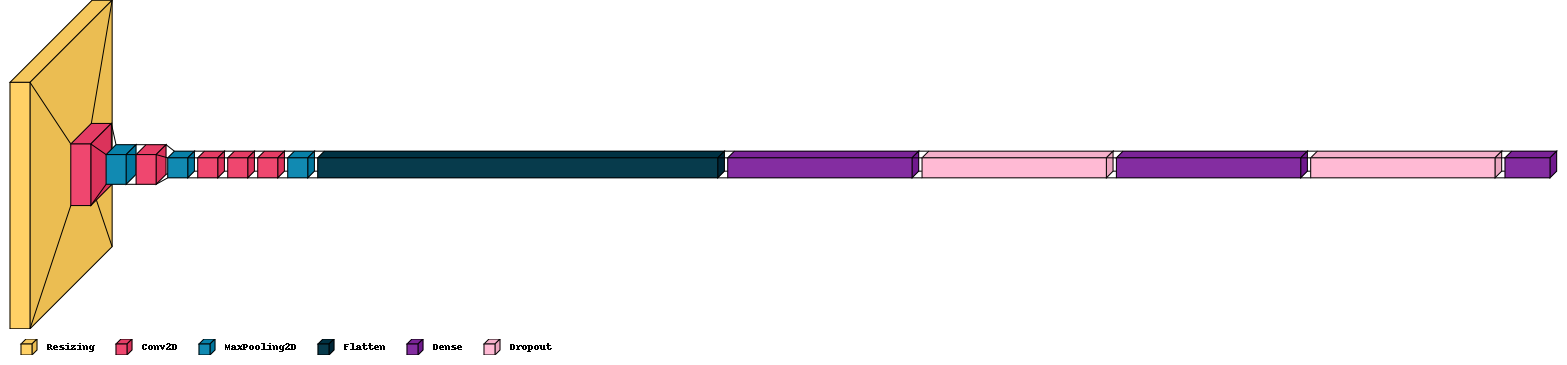

In [8]:
visualkeras.layered_view(model, legend=True, draw_volume=True, scale_xy=1.1, scale_z=0.045)  # Displays the model in a layered view

In [9]:
del model

# VGG-16

### Historical Context
- Developed in 2014 by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) at Oxford
- Achieved state-of-the-art results in ILSVRC 2014

### Architecture Overview
- 16 layers (13 convolutional, 3 fully connected)
- Very deep network: more than 138 million parameters
- Uses small 3x3 convolutional filters

### Key Features
- Demonstrates the importance of depth in neural networks
- Uniform architecture with 3x3 convolutions and 2x2 max pooling
- Uses ReLU activation functions

### Significance
- Showed that depth is crucial for high performance
- Popularized the use of smaller convolutional filters
- Demonstrated the benefits of weight initialization

### Limitations
- Very computationally expensive to train
- Large number of parameters

In [10]:
def VGG_16():
    model = Sequential()
    model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, strides=2))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, strides=2))
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, strides=2))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, strides=2))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))
    return model

In [11]:
model = VGG_16()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

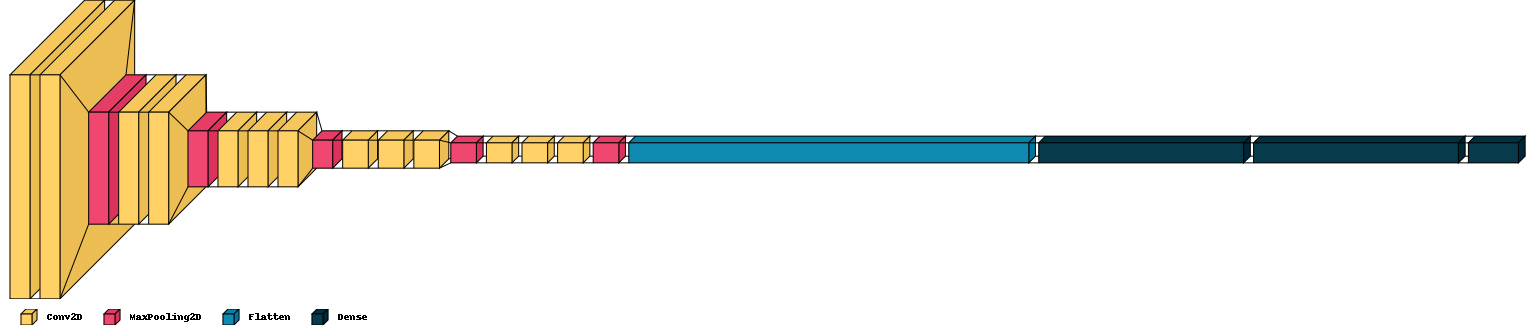

In [12]:
visualkeras.layered_view(model, legend=True, draw_volume=True, scale_xy=1, scale_z=0.05)

In [13]:
del model

# Model Comparison
The table below summarizes the key characteristics of three well-known convolutional neural network architectures: LeNet, AlexNet, and VGG16.

In [ ]:
models_dict = {
    "LeNet": LeNet_5(),
    "AlexNet": AlexNet(),
    "VGG16": VGG_16()
}

In [18]:
def calculate_model_size(model):
    return model.count_params() * 4 / (1024 ** 2)

In [19]:
model_summaries = []
for model_name, model in models_dict.items():
    num_params = model.count_params()
    num_layers = len(model.layers)
    input_shape = model.input_shape
    model_size = calculate_model_size(model)

    model_summaries.append([model_name, num_params, num_layers, input_shape, f"{model_size:.2f} MB"])

In [20]:
headers = ["Model", "Number of Parameters", "Number of Layers", "Input Shape", "Size (MB)"]

# Display Summary Table
print(tabulate(model_summaries, headers=headers, tablefmt="fancy_grid"))

╒═════════╤════════════════════════╤════════════════════╤═════════════════════╤═════════════╕
│ Model   │   Number of Parameters │   Number of Layers │ Input Shape         │ Size (MB)   │
╞═════════╪════════════════════════╪════════════════════╪═════════════════════╪═════════════╡
│ LeNet   │                  61706 │                 10 │ (None, 32, 32, 1)   │ 0.24 MB     │
├─────────┼────────────────────────┼────────────────────┼─────────────────────┼─────────────┤
│ AlexNet │               62378344 │                 15 │ (None, 227, 227, 3) │ 237.95 MB   │
├─────────┼────────────────────────┼────────────────────┼─────────────────────┼─────────────┤
│ VGG16   │              138357544 │                 22 │ (None, 224, 224, 3) │ 527.79 MB   │
╘═════════╧════════════════════════╧════════════════════╧═════════════════════╧═════════════╛


## References

- [LeNet - Wikipedia](https://en.wikipedia.org/wiki/LeNet)
- [AlexNet - Wikipedia](https://en.wikipedia.org/wiki/AlexNet)
- [Convolutional Neural Networks (DeepLearning.AI)](https://www.coursera.org/learn/convolutional-neural-networks)
- [LeNet with TensorFlow](https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df)
- [AlexNet with TensorFlow](https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8)
- [Creating VGG from Scratch using Tensorflow](https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155)